In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Lasso

In [3]:
df=pd.read_csv("./ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


<Axes: >

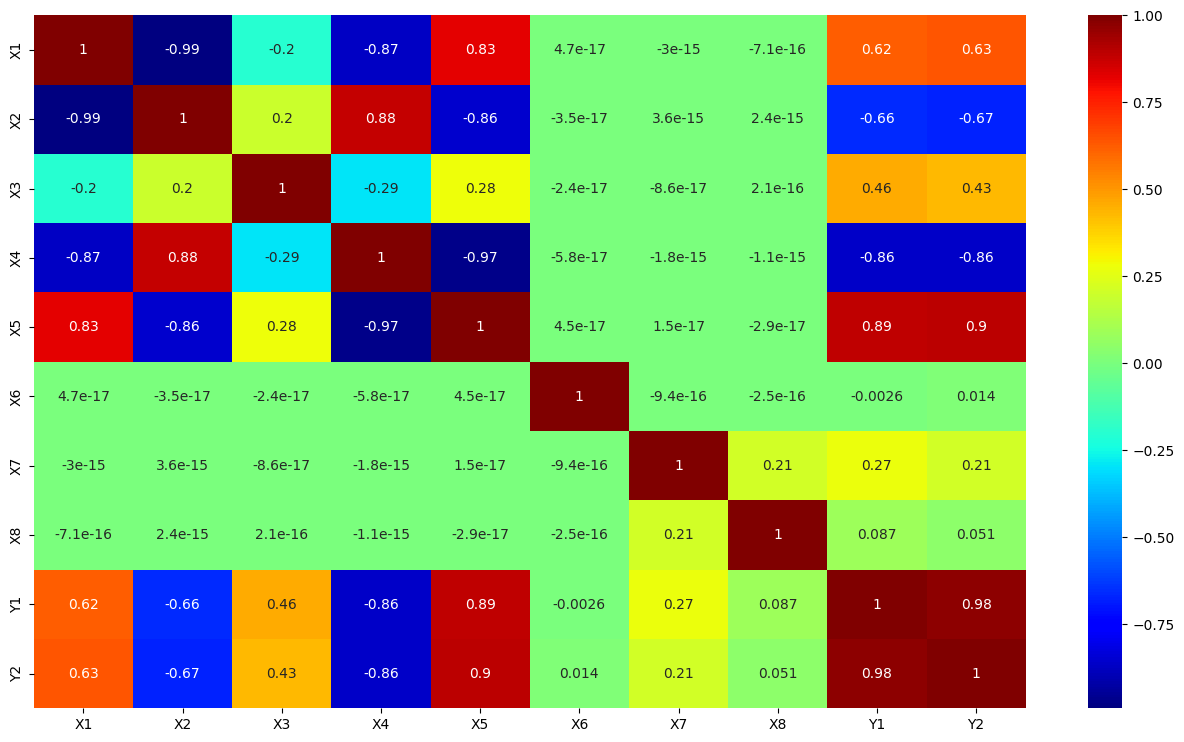

In [9]:
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap='jet')

In [17]:
X = df.drop(['Y1', 'Y2'], axis=1)
y = df[['Y1', 'Y2']]

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [18]:
# Train Val Split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
x_train

,X1,X2,X3,X4,X5,X6,X7,X8
60,0.82,612.5,318.5,147.00,7.0,2,0.10,1
618,0.64,784.0,343.0,220.50,3.5,4,0.40,2
346,0.86,588.0,294.0,147.00,7.0,4,0.25,2
294,0.90,563.5,318.5,122.50,7.0,4,0.25,1
231,0.66,759.5,318.5,220.50,3.5,5,0.10,4
...,...,...,...,...,...,...,...,...
71,0.76,661.5,416.5,122.50,7.0,5,0.10,1
106,0.86,588.0,294.0,147.00,7.0,4,0.10,2
270,0.71,710.5,269.5,220.50,3.5,4,0.10,5
435,0.98,514.5,294.0,110.25,7.0,5,0.25,4


In [19]:
def evaluate(model):
  preds=model.predict(x_test)
  print("Testing error:")
  print(metrics.mean_squared_error(y_test,preds))
  print("Training error:")
  tpreds=model.predict(x_train)
  print(metrics.mean_squared_error(y_train,tpreds))
  plt.scatter(y_train.iloc[:,0], tpreds[:,0])
  plt.xlabel("True Y1")
  plt.ylabel("Predicted Y1")
  plt.title("Scatter plot of True Y1 vs Predicted Y1 (Training)")
  z1 = np.polyfit(y_train.iloc[:,0], tpreds[:,0], 1)
  p1 = np.poly1d(z1)
  plt.plot(y_train.iloc[:,0], p1(y_train.iloc[:,0]), color='red')
  plt.show()

  plt.scatter(y_train.iloc[:,1], tpreds[:,1])
  plt.xlabel("True Y2")
  plt.ylabel("Predicted Y2")
  plt.title("Scatter plot of True Y2 vs Predicted Y2 (Training)")
  z2 = np.polyfit(y_train.iloc[:,1], tpreds[:,1], 1)
  p2 = np.poly1d(z2)
  plt.plot(y_train.iloc[:,1], p2(y_train.iloc[:,1]), color='red')
  plt.show()

Testing error:
9.999378008690957
Training error:
9.752757722014465


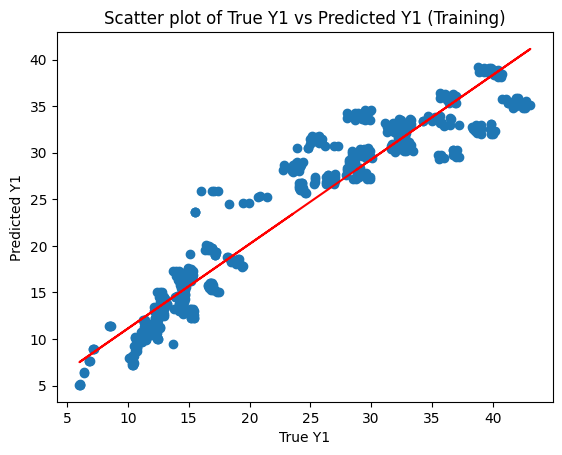

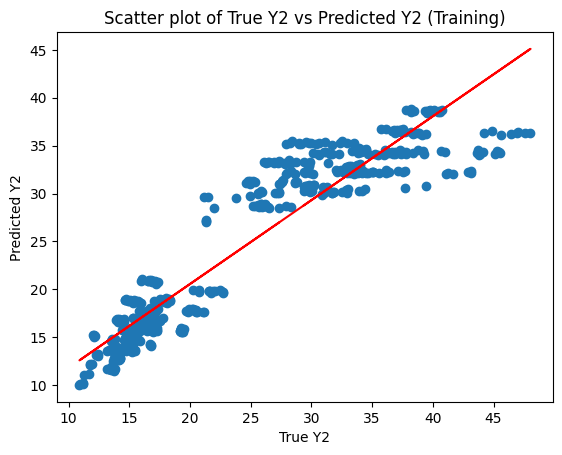

In [21]:
ridge=MultiOutputRegressor(Ridge(random_state=42))
ridge.fit(x_train,y_train)
evaluate(ridge)

Testing error:
21.285775848923368
Training error:
20.515059338703914


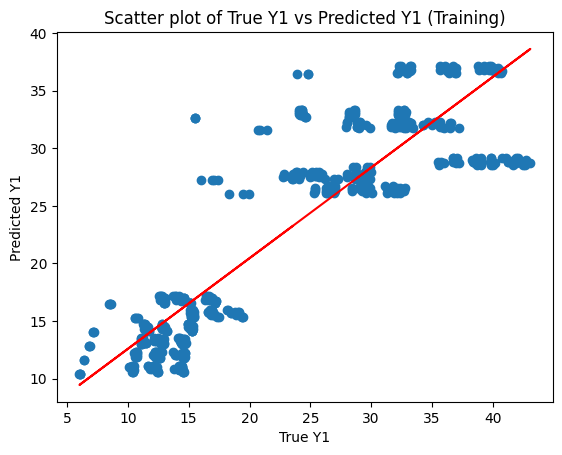

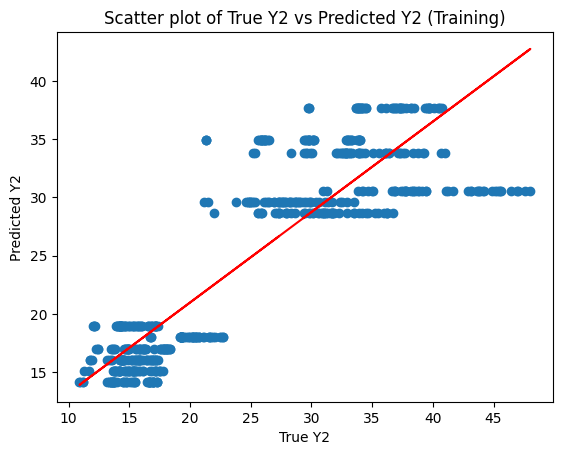

In [22]:
lasso=MultiOutputRegressor(Lasso(random_state=42))
lasso.fit(x_train,y_train)
evaluate(lasso)

Testing error:
9.541420603941368
Training error:
9.295339591977616


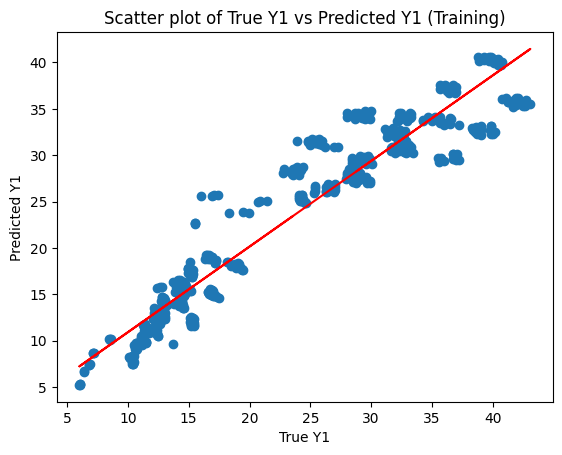

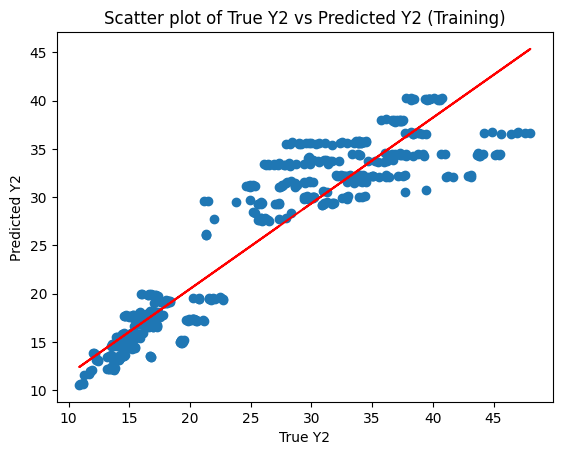

In [23]:
lr=MultiOutputRegressor(LinearRegression())
lr.fit(x_train,y_train)
evaluate(lr)